In [1]:
# Import libraries
import os
from zipfile import ZipFile
from IPython.display import Image
from urllib.request import urlretrieve
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating folder
my_directory = os.path.join(os.getcwd(), 'resources', 'lesson 4')

if not os.path.exists(path=my_directory):
    os.makedirs(name=my_directory)

In [3]:
# Download files and unzip them
URL = "https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"
zip_file = os.path.join(my_directory, 'opencv_bootcamp_assets_NB4.zip')

try:
    urlretrieve(url=URL, filename=zip_file)
    
    with ZipFile(file=zip_file, mode='r') as z:
        z.extractall(my_directory)
    print('OK!')
except Exception as e:
    print(e)

OK!


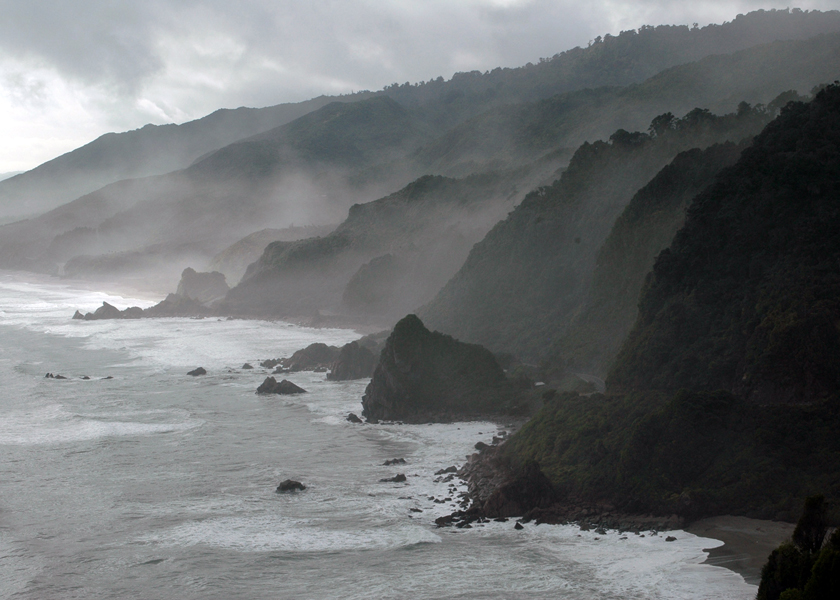

In [4]:
# Read file
img = cv2.imread(os.path.join(my_directory, 'New_Zealand_Coast.jpg'), flags=1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Image(filename=os.path.join(my_directory, 'New_Zealand_Coast.jpg'))

# Brighter and Darker

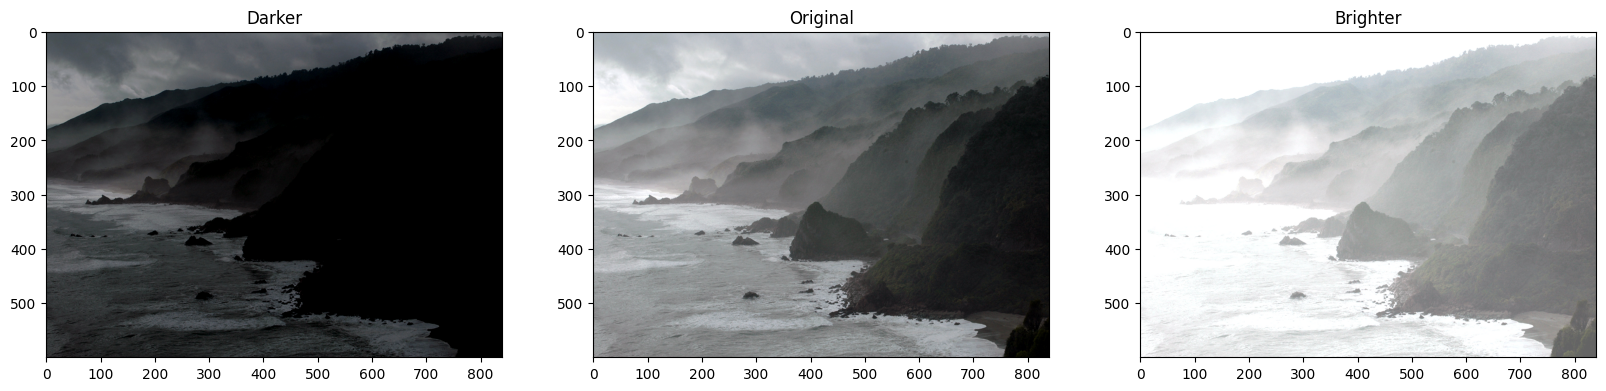

In [5]:
matrix = np.ones(shape=img.shape, dtype='uint8') * 100

img_brighter = cv2.add(src1=img, src2=matrix)
img_darker = cv2.subtract(src1=img, src2=matrix)

# Display the images
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.imshow(X=img_darker)
plt.title('Darker')

plt.subplot(132)
plt.imshow(X=img)
plt.title('Original')

plt.subplot(133)
plt.imshow(X=img_brighter)
plt.title('Brighter');

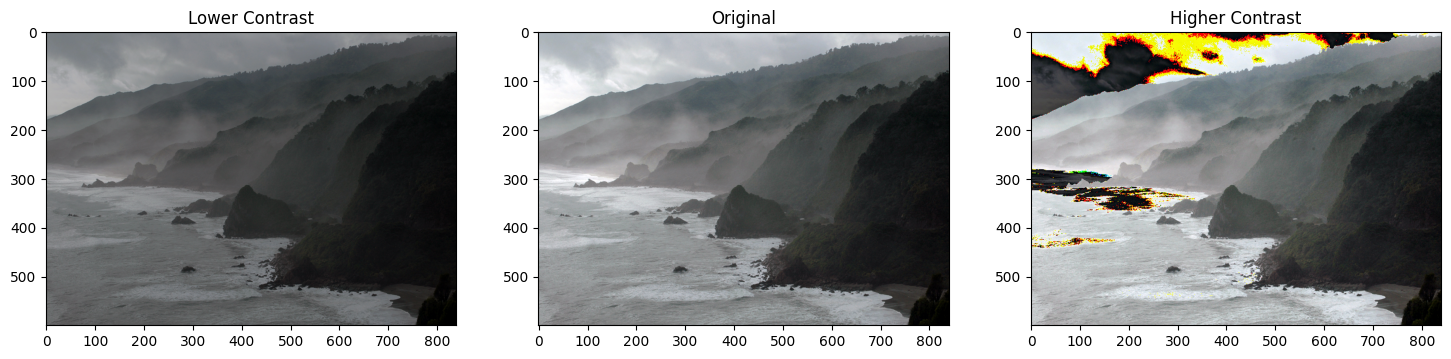

In [16]:
# Contrast
matrix1 = np.ones(img.shape) * 0.7
matrix2 = np.ones(img.shape) * 1.3

img_darker = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_brighter = np.uint8(cv2.multiply(np.float64(img), matrix2))

plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.imshow(img_darker)
plt.title('Lower Contrast')

plt.subplot(132)
plt.imshow(img)
plt.title('Original')

plt.subplot(133)
plt.imshow(img_brighter)
plt.title('Higher Contrast');

# [numpy.clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html)

Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.

Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.

(572, 800)


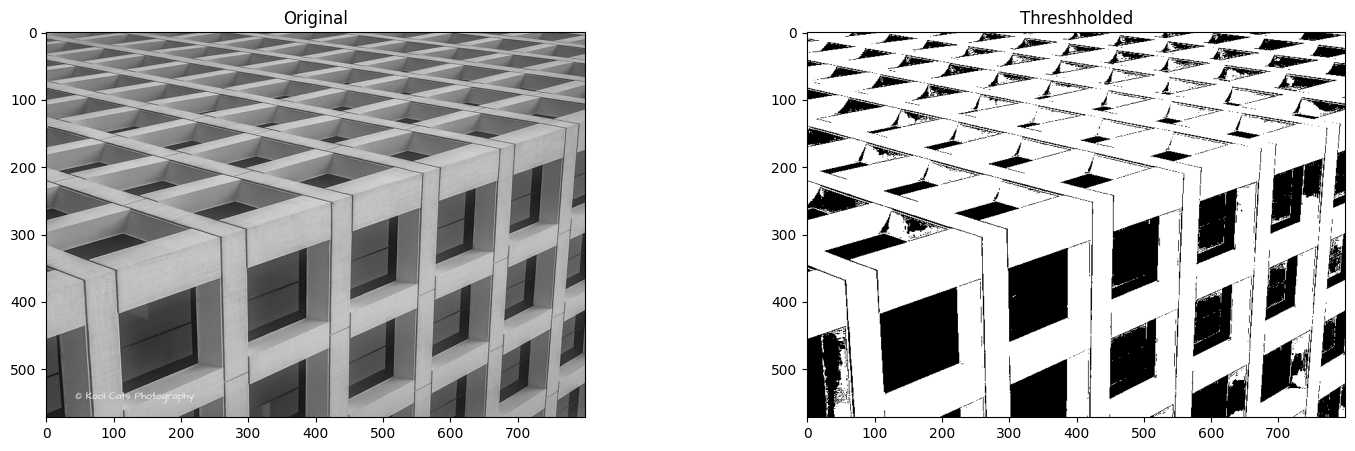

In [20]:
building = cv2.imread('resources/lesson 4/building-windows.jpg', cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(src=building, thresh=100, maxval=255, type=cv2.THRESH_BINARY)

plt.figure(figsize=(18, 5))
plt.subplot(121)
plt.imshow(building, cmap='gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(img_thresh, cmap='gray')
plt.title('Threshholded');
print(img_thresh.shape)

## Picture above made more binary (simple)

When **cv2.threshold()** function is applied to a grayscale image with a threshold value of 127 and maximum value of 255, then:
    
Pixels with intensity less than or equal to 127 are set to 0, and pixels with intensity greater than 127 are set to 255.

# [OpenCV Bitwise AND, OR, XOR, and NOT](https://pyimagesearch.com/2021/01/19/opencv-bitwise-and-or-xor-and-not/)

(700, 700, 3)


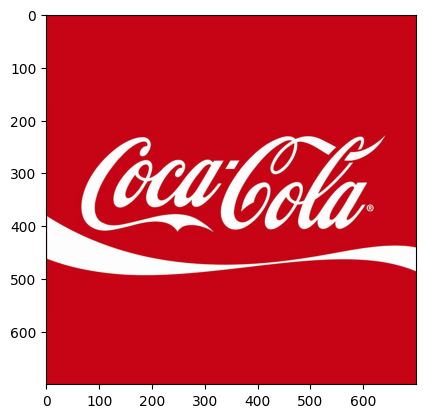

In [24]:
# Cola image
cola_bgr = cv2.imread('resources/lesson 4/coca-cola-logo.png')
cola = cv2.cvtColor(src=cola_bgr, code=cv2.COLOR_BGR2RGB)
plt.imshow(cola)

print(cola.shape)
width = cola.shape[0]
height = cola.shape[1]

(700, 700, 3)


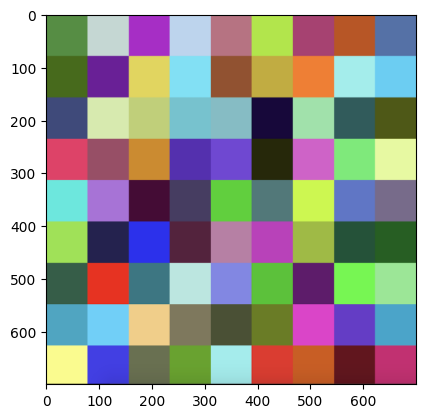

In [25]:
# Make same size
colors = cv2.imread('resources/lesson 4/checkerboard_color.png')
colors = cv2.cvtColor(colors, cv2.COLOR_BGR2RGB)

colors = cv2.resize(src=colors, dsize=(width, height))
plt.imshow(colors)
print(colors.shape)

(700, 700)


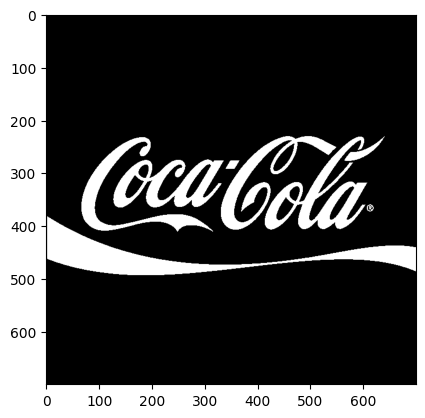

In [28]:
# Mask for coca cola
gray_cola = cv2.cvtColor(cola, cv2.COLOR_RGB2GRAY)
retval, mask = cv2.threshold(src=gray_cola, thresh=127, maxval=255, type=cv2.THRESH_BINARY)

plt.imshow(mask, cmap='gray')
print(mask.shape)

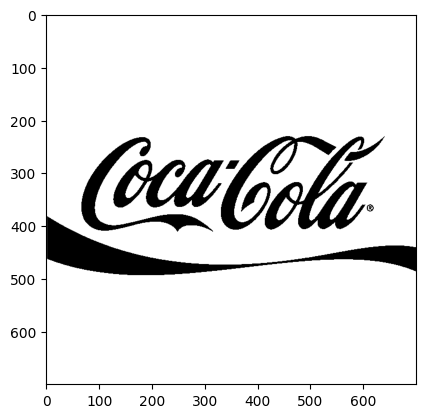

In [30]:
# Invert the mask
inverted_cola = cv2.bitwise_not(src=mask)
plt.imshow(X=inverted_cola, cmap='gray');